### Documentos

Banco que trabalha com estrutura em documentos (XML)

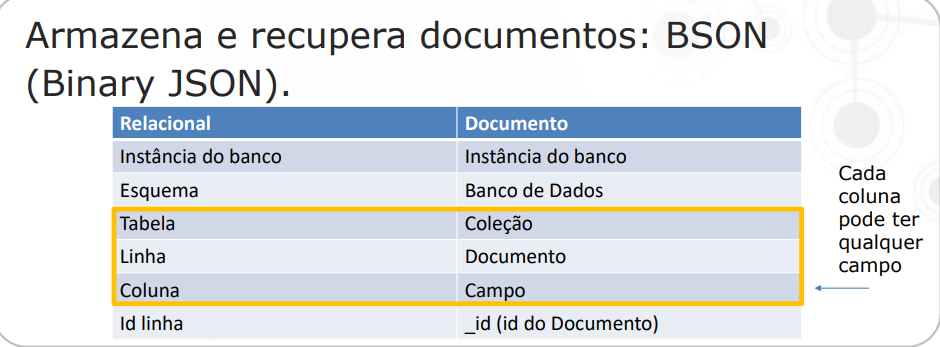

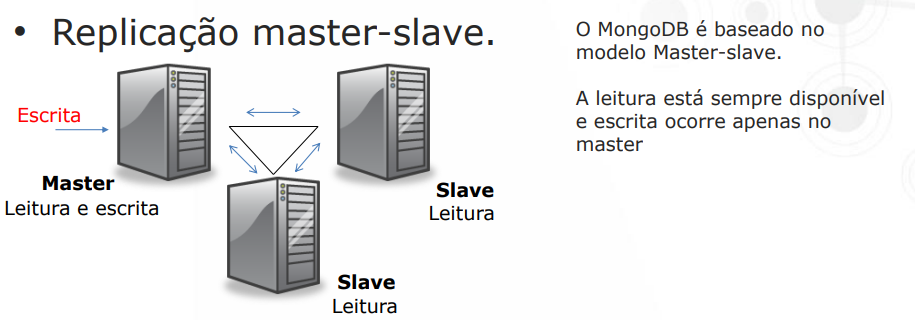

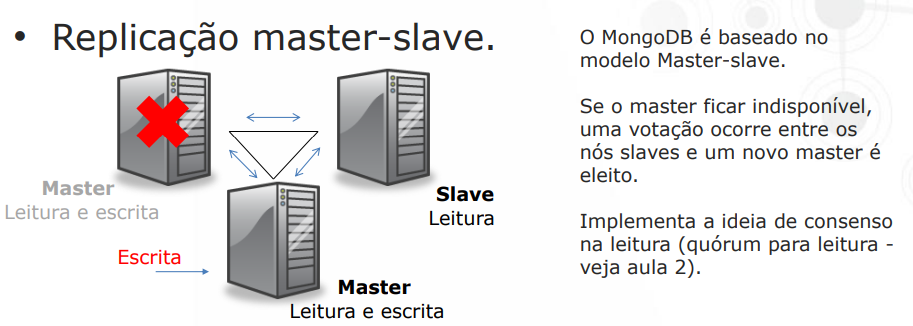

Crie a pasta: C:\data\db

Após instalar o MongoDB, para iniciar:
    - C:\Program Files\MongoDB\Server\3.6\bin>mongod.exe
        
Para conectar ao BD:
    - C:\Program Files\MongoDB\Server\3.6\bin>mongo.exe
   
Comandos:

    - show dbs: Mostra base de dados existentes
    - use <db_documents>: Criar instância do BD

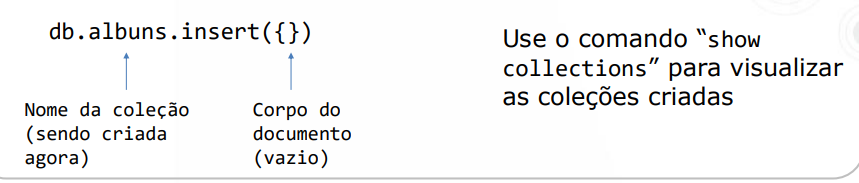

#### Insert

    - db.<tabela>.insert({}): Cria a tabela caso não exista
    - show collections: Mostra tabelas/collections criadas
    - db.<collection>.find({})

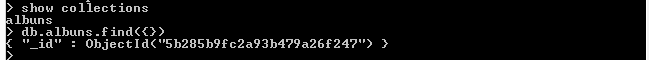

Os objetos no MongoDB é o JSON

db.albuns.insert({"nome" : "The Dark Side Of The Moon ","data" : new Date(1973, 3, 29)})

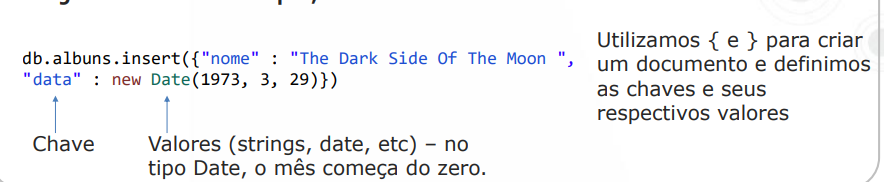

db.*nome collection*.find({})

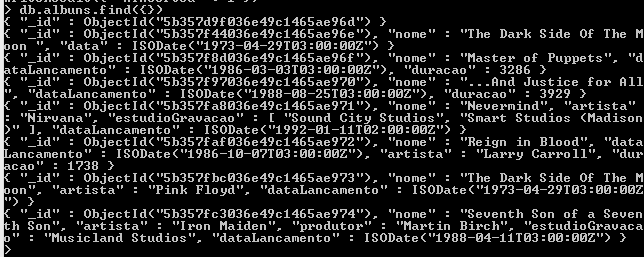

db.nome collection.find({}).pretty()

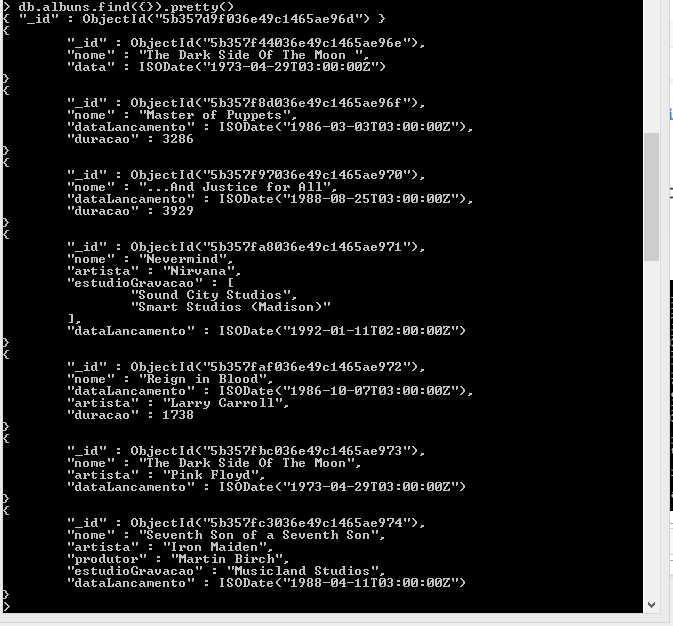

#### SELECT

db.albuns.find({"nome" : "Seventh Son of a Seventh Son"})

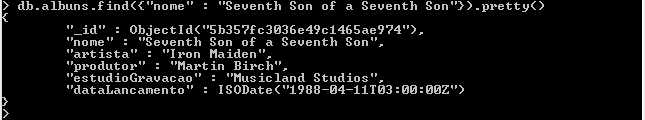

O BD não possui estrutura rígida do banco de dados

##### Principal caracteristica de um banco NoSQL é que ele possibilida você cadastrar dados nãoestruturados

Este comando irá retornar uma lista de documentos que satisfazem a condição. Se desejar retornar apenas um documento (o primeiro que satisfaz a condição ou null se nenhum documento for encontrado), utilize findone()

#### REMOVE

db.albuns.remove({"nome": "The Dark Side Of The Moon"})


##### UPDATE

db.albuns.update({"nome":"Among the Living"},{$set : {"duracao" : 3013}})

WriteResult({ "nMatched" : 1, "nUpserted" : 0, "nModified" : 1 })

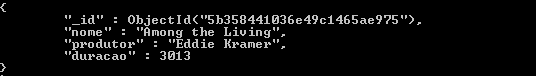

#### Consultas mais complexas

Podemos realizar consultas mais complexas utilizando o MondoDB. Por exemplo, como encontrar um (ou mais) álbum(ns) cuja duração
seja menor que um valor especificado na consulta. 

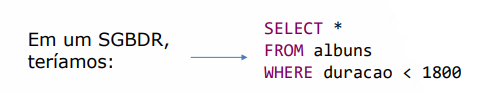

|x     | Operador Descrição         Usar o $ antes                        |
|------|------------------------------------------------------------------|
|gt  |maior que o valor específico na query.                            |
|gte |maior ou igual ao valor específico na query.                      |
|in  |quaisquer valores que existem em um array específico em uma query |
|lt  |valores que são menores que o valor específico na query.          |
|lte |valores que são menores ou iguais que o valor específico na query |
|ne  |todos os valores que não são iguais ao valor específico na query. |
|nin |valores que não existem em um array específico da query           |

*db.albuns.find({"duracao" : {"$lt" : 1800}}).pretty()*

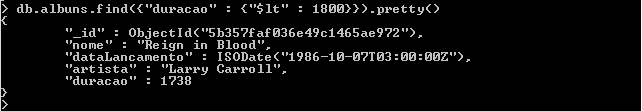

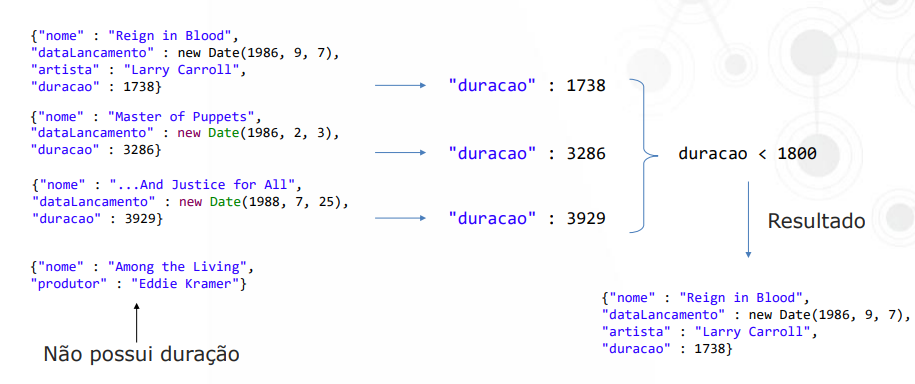

*db.albuns.find({"duracao" : {"$in" : [1738,3286]}}).pretty()*

In [2]:
#> db.albuns.find({"duracao" : {"$in" : [1738,3286]}}).pretty()
# {
#         "_id" : ObjectId("5b357f8d036e49c1465ae96f"),
#         "nome" : "Master of Puppets",
#         "dataLancamento" : ISODate("1986-03-03T03:00:00Z"),
#         "duracao" : 3286
# }
# {
#         "_id" : ObjectId("5b357faf036e49c1465ae972"),
#         "nome" : "Reign in Blood",
#         "dataLancamento" : ISODate("1986-10-07T03:00:00Z"),
#         "artista" : "Larry Carroll",
#         "duracao" : 1738
# }

#### Exercício

Retorne os albuns que foram lançados antes de 1990

Exercício: retorne os álbuns que foram
lançados antes de 1990. 

db.albuns.find({"dataLancamento" : {"$lt" : new Date(1990,0,1)} }).pretty() #01/01/1990

In [1]:
#db.albuns.find(
#    {$and : [
#        {"dataLancamento" : {$gte : new Date(1986, 0, 1)}},   #Mês 0 a 11
#        {"dataLancamento" : {$lt : new Date(1987, 0, 1)}}
#    ]}
#).pretty()

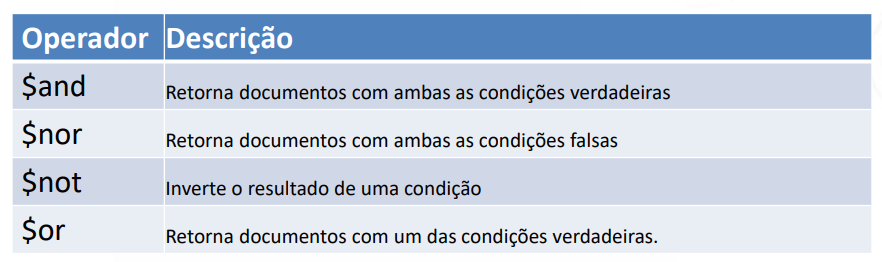

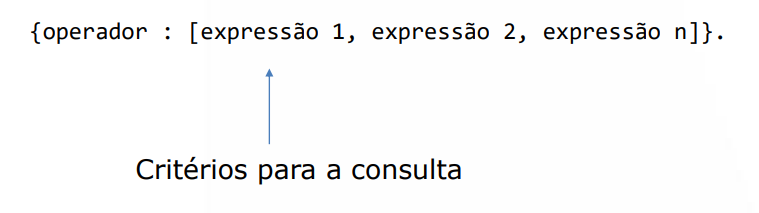

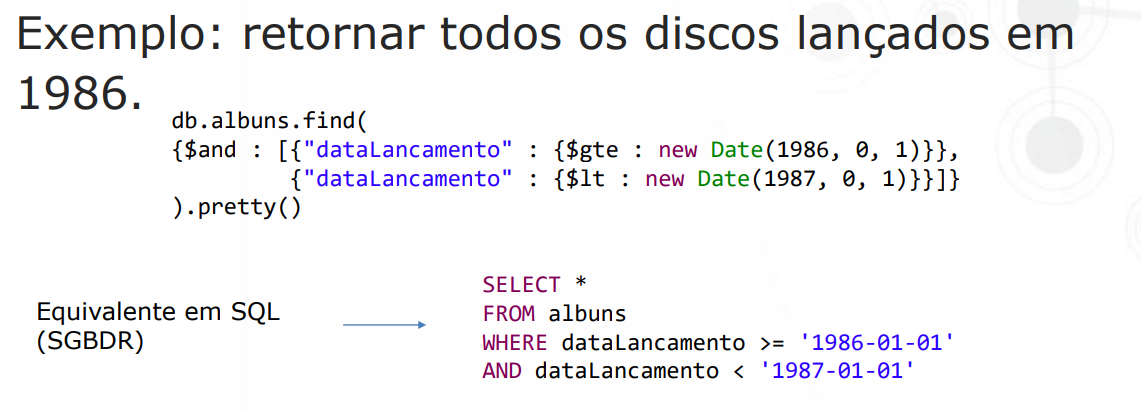

#### INSERIR RELACIONAMENTO

db.artistas.insert([ {"nome" : "Metallica"},
{"nome" : "Megadeath"},
{"nome" : "Slayer"},
{"nome" : "Anthrax"},
{"nome" : "Iron Maiden"},
{"nome" : "Nirvana"},
{"nome" : "Pink Floyd"}])

Observe que cada documento só contem o campo "nome"

db.artistas.find().pretty() 

#### Chave estrangeira

> db.artistas.find().pretty()
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493460"), "nome" : "Metallica" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493461"), "nome" : "Megadeath" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493462"), "nome" : "Slayer" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493463"), "nome" : "Anthrax" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493464"), "nome" : "Iron Maiden" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493465"), "nome" : "Nirvana" }
{ "_id" : ObjectId("5b36cd3d6ecaed0a6d493466"), "nome" : "Pink Floyd" }


"_id" : ObjectId("5b357f44036e49c1465ae96e"),
"_id" : ObjectId("5b357f8d036e49c1465ae96f"),
"_id" : ObjectId("5b357f97036e49c1465ae970"),
"_id" : ObjectId("5b357fa8036e49c1465ae971"),
"_id" : ObjectId("5b357faf036e49c1465ae972"),
"_id" : ObjectId("5b357fc3036e49c1465ae974"),
"_id" : ObjectId("5b358441036e49c1465ae975"),


db.albuns.update( {"nome" : "The Dark Side Of The Moon "}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493460")}});
db.albuns.update( {"nome" : "Master of Puppets"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493461")}});
db.albuns.update( {"nome" : "...And Justice for All"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493462")}});
db.albuns.update( {"nome" : "Nevermind"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493463")}});
db.albuns.update( {"nome" : "Reign in Blood"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493464")}});
db.albuns.update( {"nome" : "Seventh Son of a Seventh Son"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493465")}});
db.albuns.update( {"nome" : "Among the Living"}, {$set : {"artista_id" : ObjectId("5b36cd3d6ecaed0a6d493466")}});

In [ ]:
### Buscar

var artista = db.artistas.findOne({"nome" : "Metallica"});
var albuns = db.albuns.find({"artista_id" : artista._id});
albuns

### Remove
db.artistas.remove({ _id: {$gt: ObjectId("5b36cd3d6ecaed0a6d493466") } } )

    • Apesar de mapearmos um relacionamento entre documentos no MongoDB, as *restrições de integridade referencial* presentes no modelo relacional) não se aplicam a este banco.

    • O controle sobre tal característica é de responsabilidade da aplicação.

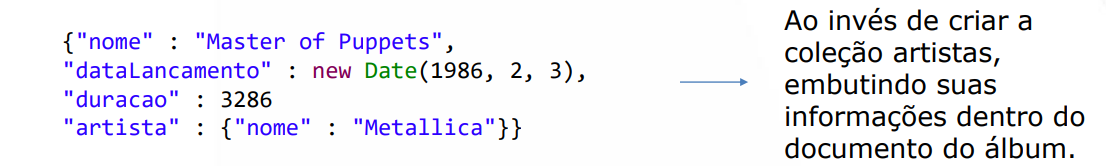

#### Documento alinhado (Performance)

Uso da estrutura para busca diretas sem necessidade de relacionamento